# shootings_dataset (Project 5):
#### Raghad Alsukhaiber

## Table of content:
- [Introduction](#intro)
- [Gathering Data](#Gathering)
- [Assessing Data](#Assessing)
- [Cleaning Data](#Cleaning)
- [Visualization](#Visualization)

<a id='intro'></a>
### Introduction
We have a dataset called “Mother Jones - Mass Shootings Database, 1982 – 2022” and it has the information about murdered that happened over the years since 1982 until 2022 [Dataset](https://www.motherjones.com/politics/2012/12/mass-shootings-mother-jones-full-data/).
- I saved the file as a `csv` file under the name 'shootings_dataset'.

#### contain:

	Case :The exact place where the shooting happened 

	Location :The city, state, or country of the shooting

	Date :The date for the shooting

	Summary :A brief description about what happened and the who was involved

	Fatalities :The number of people who were killed

	Injured :The number of people who were hurts but not died

	Total victims :The summation between the number of died & hurts people

	Location :The site where the shooting happened

	Age of shooter :How old are the killer

	Prior signs mental health issues :If the killer has mental health or not

	Mental health details :How they had it (the mental health)

	Weapons obtained legally :About the weapon was he carrying it legally or illegally

	Where obtained :From where they had the weapon

	Weapon type :The type of the weapon 

	Weapon details :What is the kind of the weapon

	Race :The race of the killer or where are they from

	Gender :Is it a male or female

	Sources :From where we got those information’s about the shooting

	Mental health sources :The website that we got the information about the mental health

	Sources additional age :Source of Information about the killer age

	Latitude :geographic coordinate

	Longitude :geographic coordinate

	Type :What type of shooting was it

	Year :The year of the shooting


<a id='Gathering'></a>
### Gathering Data:

In [1]:
# Imports the needed library..
import pandas as pd
from pandasql import sqldf
import numpy as np
from statistics import mean
import os

read the .csv file

In [3]:
shoot_data = pd.read_csv(r'shootings_dataset.csv', encoding='cp1252')

<a id='Assessing'></a>
### Assessing Data:

to know what is the type of this file

In [4]:
# the data type..
type(shoot_data)

pandas.core.frame.DataFrame

print the information about the dataset

In [5]:
# the dataset..
shoot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 24 columns):
case                                133 non-null object
location                            133 non-null object
date                                133 non-null object
summary                             133 non-null object
fatalities                          133 non-null int64
injured                             133 non-null object
total_victims                       133 non-null object
location.1                          133 non-null object
age_of_shooter                      133 non-null object
prior_signs_mental_health_issues    133 non-null object
mental_health_details               133 non-null object
weapons_obtained_legally            133 non-null object
where_obtained                      133 non-null object
weapon_type                         133 non-null object
weapon_details                      133 non-null object
race                                133 non-null object


number of columns of the dataset

In [6]:
len(shoot_data.columns)

24

number of rows of the dataset

In [7]:
len(shoot_data)

133

In [8]:
# present the first 5 rows of the dataset..
shoot_data.head(5)

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,...,weapon_details,race,gender,sources,mental_health_sources,sources_additional_age,latitude,longitude,type,year
0,Greenwood Park Mall shooting,"Greenwood, Indiana",7/17/22,DETAILS PENDING,3,2,5,workplace,-,-,...,-,-,M,https://apnews.com/article/indiana-mall-shooti...,-,-,-,-,Mass,2022
1,Highland Park July 4 parade shooting,"Highland Park, Illinois",07/04/2022,"Suspected gunman Robert ""Bobby"" Crimo, 21, all...",7,46,53,Other,21,-,...,"AR-15 style rifle, possibly modified for rapid...",White,M,https://www.cbsnews.com/chicago/news/suspect-i...,-,-,-,-,Mass,2022
2,Church potluck dinner shooting,"Birmingham, Alabama",6/16/22,"Robert Findlay Smith, 70, opened fire with a h...",3,0,3,religious,70,-,...,-,White,M,https://apnews.com/article/alabama-birmingham-...,-,-,-,-,Mass,2022
3,Concrete company shooting,"Smithsburg, Maryland",06/09/2022,The suspected 23-year-old gunman shot four cow...,3,1,4,workplace,23,-,...,-,-,M,https://www.washingtonpost.com/dc-md-va/2022/0...,-,-,-,-,Mass,2022
4,Tulsa medical center shooting,"Tulsa, Oklahoma",06/01/2022,"Michael Louis, 45, killed four, including two ...",4,(TK - fewer than 10,TK,workplace,-,-,...,AR-15 style rifle,Black,M,https://www.nytimes.com/live/2022/06/01/us/tul...,-,-,-,-,Mass,2022


In [9]:
# present the last 5 rows of the dataset..
shoot_data.tail()

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,...,weapon_details,race,gender,sources,mental_health_sources,sources_additional_age,latitude,longitude,type,year
128,Shopping centers spree killings,"Palm Bay, Florida",4/23/1987,"Retired librarian William Cruse, 59, was paran...",6,14,20,Other,59,Yes,...,"Sturm, Ruger Mini-14 semiautomatic rifle; 20-g...",white,Male,http://articles.latimes.com/1987-04-25/news/mn...,(Supreme Court of Florida Document) http://www...,http://articles.latimes.com/1987-04-25/news/mn...,28.0331886,-80.6429695,Spree,1987
129,United States Postal Service shooting,"Edmond, Oklahoma",8/20/1986,"Postal worker Patrick Sherrill, 44, opened fir...",15,6,21,Workplace,44,Unclear,...,".22-caliber, two .45-caliber Colt Model 1911-A...",white,Male,http://news.google.com/newspapers?id=dm8aAAAAI...,http://newsok.com/sherrill-feared-mental-illne...,http://news.google.com/newspapers?id=dm8aAAAAI...,35.6672015,-97.42937037,Mass,1986
130,San Ysidro McDonald's massacre,"San Ysidro, California",7/18/1984,"James Oliver Huberty, 41, opened fire in a McD...",22,19,41,Other,41,Yes,...,9mm Browning P35 Hi-Power semiautomatic handgu...,white,Male,http://www.utsandiego.com/san-ysidro-massacre/...,http://www.nctimes.com/news/local/article_2ba4...,http://www.utsandiego.com/san-ysidro-massacre/...,32.5520013,-117.0430813,Mass,1984
131,Dallas nightclub shooting,"Dallas, Texas",6/29/1984,"Abdelkrim Belachheb, 39, opened fire at an ups...",6,1,7,Other,39,Yes,...,9mm Smith & Wesson 459 semiautomatic handgun,white,Male,http://books.google.com/books?id=Hr3OBwP-lbUC&...,http://books.google.com/books?id=Hr3OBwP-lbUC&...,http://books.google.com/books?id=Hr3OBwP-lbUC&...,32.925166,-96.838676,Mass,1984
132,Welding shop shooting,"Miami, Florida",8/20/1982,"Junior high school teacher Carl Robert Brown, ...",8,3,11,Other,51,Yes,...,Mossberg 500 Persuader pump-action shotgun wit...,white,Male,http://www.nytimes.com/1982/08/21/us/gunman-in...,http://news.google.com/newspapers?id=uuYLAAAAI...,http://www.nytimes.com/1982/08/21/us/gunman-in...,25.796491,-80.226683,Mass,1982


display the columns name

In [10]:
# display the name of each columns on the file..
shoot_data.columns

Index(['case', 'location', 'date', 'summary', 'fatalities', 'injured',
       'total_victims', 'location.1', 'age_of_shooter',
       'prior_signs_mental_health_issues', 'mental_health_details',
       'weapons_obtained_legally', 'where_obtained', 'weapon_type',
       'weapon_details', 'race', 'gender', 'sources', 'mental_health_sources',
       'sources_additional_age', 'latitude', 'longitude', 'type', 'year'],
      dtype='object')

In [11]:
# Show summary statistics on Fatalities
shoot_data['fatalities'].describe()[['count', 'mean', 'min', 'max']]

count    133.000000
mean       7.932331
min        3.000000
max       58.000000
Name: fatalities, dtype: float64

In [12]:
# count the number of injured people..
shoot_data['injured'].describe()[['count']]

count    133
Name: injured, dtype: object

pirnt the unique values of the columns below

In [13]:
shoot_data.gender.unique()

array(['M', 'Male & Female', 'F', 'Male', 'Female'], dtype=object)

In [14]:
shoot_data.type.unique()

array(['Mass', 'Spree'], dtype=object)

In [15]:
shoot_data.race.unique()

array(['-', 'White', 'Black', 'Latino', 'Asian', 'Other', 'White ',
       'Native American', 'white', 'black', 'unclear'], dtype=object)

<a id='Cleaning'></a>
### Cleaning Data:

change the name of the location column to be 'Country' to avoid the similarity

In [16]:
#rename the matched column..
shoot_data = shoot_data.rename(columns={'location': 'Country'})

In [17]:
# display the edit..
shoot_data.columns

Index(['case', 'Country', 'date', 'summary', 'fatalities', 'injured',
       'total_victims', 'location.1', 'age_of_shooter',
       'prior_signs_mental_health_issues', 'mental_health_details',
       'weapons_obtained_legally', 'where_obtained', 'weapon_type',
       'weapon_details', 'race', 'gender', 'sources', 'mental_health_sources',
       'sources_additional_age', 'latitude', 'longitude', 'type', 'year'],
      dtype='object')

change the data type

In [18]:
# Make the below variable from types 'category'..
shoot_data.year = shoot_data.year.astype('category')
shoot_data.gender = shoot_data.gender.astype('category')
shoot_data.longitude = shoot_data.longitude.astype('category')
shoot_data.latitude = shoot_data.latitude.astype('category')

delete the below row from injured to clean the dataset

In [19]:
shoot_data.query("injured == '(TK - fewer than 10'")

,case,Country,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,...,weapon_details,race,gender,sources,mental_health_sources,sources_additional_age,latitude,longitude,type,year
4,Tulsa medical center shooting,"Tulsa, Oklahoma",06/01/2022,"Michael Louis, 45, killed four, including two ...",4,(TK - fewer than 10,TK,workplace,-,-,...,AR-15 style rifle,Black,M,https://www.nytimes.com/live/2022/06/01/us/tul...,-,-,-,-,Mass,2022


In [20]:
shoot_data.drop(index= 4, inplace= True)

In [24]:
shoot_data.age_of_shooter.replace('-', np.nan, inplace=True) 

In [27]:
shoot_data.query("age_of_shooter == 'nan'")

,case,Country,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,...,weapon_details,race,gender,sources,mental_health_sources,sources_additional_age,latitude,longitude,type,year


change the data type for the below columns to 'int'

In [28]:
shoot_data.total_victims = shoot_data.total_victims.astype('int')

In [29]:
shoot_data.injured = shoot_data.injured.astype('int')

In [30]:
shoot_data.age_of_shooter = shoot_data.age_of_shooter.astype('int')

check the update

In [31]:
# to check the new columns type..
shoot_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 1 to 132
Data columns (total 24 columns):
case                                127 non-null object
Country                             127 non-null object
date                                127 non-null object
summary                             127 non-null object
fatalities                          127 non-null int64
injured                             127 non-null int32
total_victims                       127 non-null int32
location.1                          127 non-null object
age_of_shooter                      127 non-null int32
prior_signs_mental_health_issues    127 non-null object
mental_health_details               127 non-null object
weapons_obtained_legally            127 non-null object
where_obtained                      127 non-null object
weapon_type                         127 non-null object
weapon_details                      127 non-null object
race                                127 non-null object
gen

change the values for 'gender' to be (Male, Female, Male&Female)

In [32]:
# to replace each 'F' with 'Female' & each 'M' with 'Male'..
shoot_data.replace('F', 'Female', inplace=True) 
shoot_data.replace('M', 'Male', inplace=True) 

In [33]:
shoot_data.gender.unique()

[Male, Female, Male & Female]
Categories (3, object): [Male, Female, Male & Female]

correct the values of race

In [34]:
shoot_data.replace('Black', 'black', inplace=True) 

In [35]:
shoot_data.replace('White', 'white', inplace=True)

In [37]:
shoot_data.race.replace('-', np.nan, inplace=True) 

In [38]:
# display the values for Race..
shoot_data.race.unique()

array(['white', nan, 'Latino', 'black', 'Asian', 'Other', 'White ',
       'Native American', 'unclear'], dtype=object)

In [39]:
#replace each (-) with null values, so we can count them..
shoot_data.replace('-', np.nan, inplace=True) 

count the number of null value

In [40]:
shoot_data.isnull().sum()

case                                 0
Country                              0
date                                 0
summary                              0
fatalities                           0
injured                              0
total_victims                        0
location.1                           0
age_of_shooter                       0
prior_signs_mental_health_issues    16
mental_health_details               30
weapons_obtained_legally             8
where_obtained                      34
weapon_type                          3
weapon_details                      17
race                                 9
gender                               0
sources                              0
mental_health_sources               43
sources_additional_age              27
latitude                             5
longitude                            5
type                                 0
year                                 0
dtype: int64

In [41]:
print ("Total Missing values: " + str(shoot_data.isnull().sum().sum()))

Total Missing values: 197


<a id='Visualization'></a>
### Visualization:
- Univariate explorations:
 - 1. type
 - 2. year
 - 3. race
 - 4. gender
 - 5. age of shooter
 - 6. total victims
 
 
- Bivariate explorations:
 - 7. year & type
 - 8. race & type
 - 9. year & fatalities
 - 10. year & injured
 - 11. gender & type 
 - 12. year & race
 - 13. race & gender
 - 14. age of shooter & type
 
 
 
 
- Multivariate explorations:
 - 15. gender & age & type

In [44]:
# Imports the spicefic libraries..
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings

In [45]:
warnings.filterwarnings('ignore')

In [118]:
def figure_basics(title: str, xlabel: str="", ylabel: str="", x_double: bool=False, y_double: bool=False):
    plt.figure(figsize=( 10, 8))
    
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)

#### 1. type:
- what is the majority type of shooting?

In [46]:
# Counts each type of shooting..
shoot_data.groupby('type').sum()

,fatalities,injured,total_victims,age_of_shooter,year
type,,,,,
Mass,923,1353,2276,3657,219041
Spree,110,161,271,641,36118


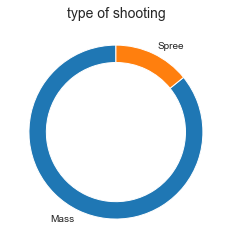

In [79]:
counts = shoot_data['type'].value_counts()
plt.pie(counts, labels = counts.index, startangle = 90,  
        counterclock = True, wedgeprops = {'width' : 0.2});
plt.title('type of shooting' , size = 14)
plt.show()

as you can see on the above plot the mass type more than the spree type

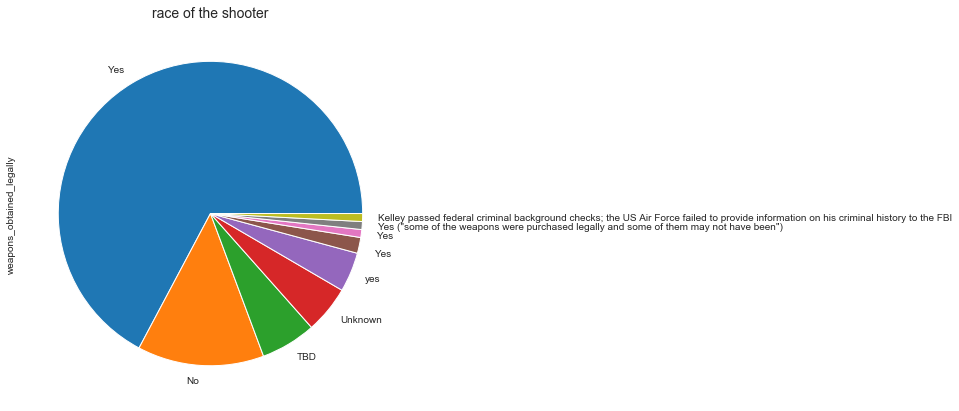

In [130]:
shoot_data['weapons_obtained_legally'].value_counts().plot(kind='pie', figsize=(7,7))
plt.title('race of the shooter' , size=14)
plt.show()

#### 2. year:
- in which age the most murderd happen?

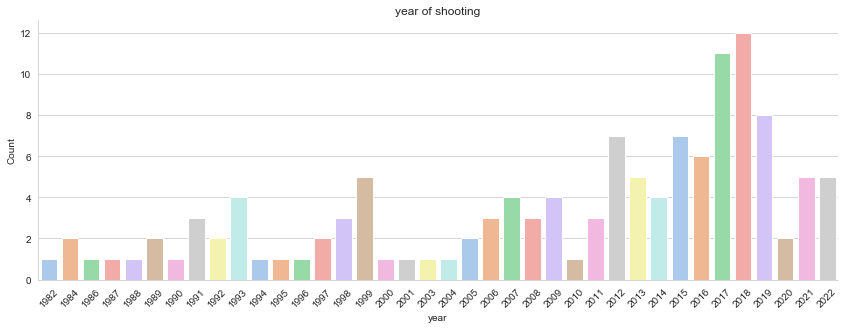

In [93]:
# present the shooting data by Year
sns.set_style("whitegrid")
sns_year = sns.factorplot(x='year', data=shoot_data, aspect=2.5, kind="count", \
                         palette="pastel").set(title='year of shooting')
sns_year.set(xlabel='year', ylabel='Count')
sns_year.set_xticklabels(rotation=45)
plt.gcf().subplots_adjust(bottom=0.25)
plt.gcf().subplots_adjust(left=0.10)

the number of shooting increased between (2015 - 2019)

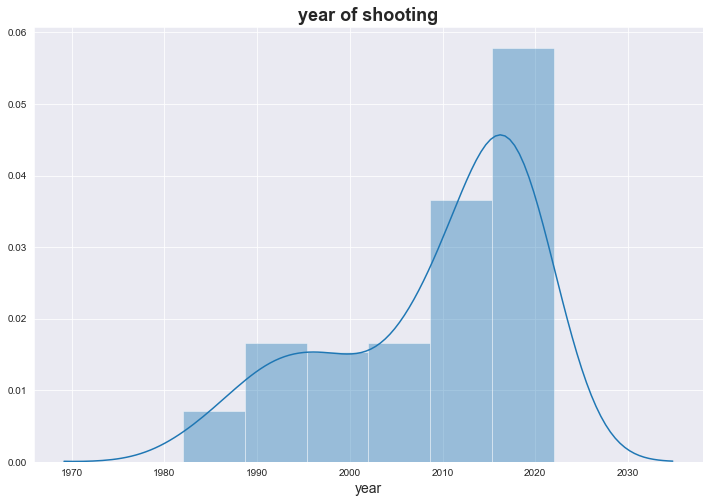

In [89]:
# another plot for year column..
figure_basics("year of shooting")
sns.distplot(shoot_data['year']);

#### 3. race:
- who made the shooting the most?

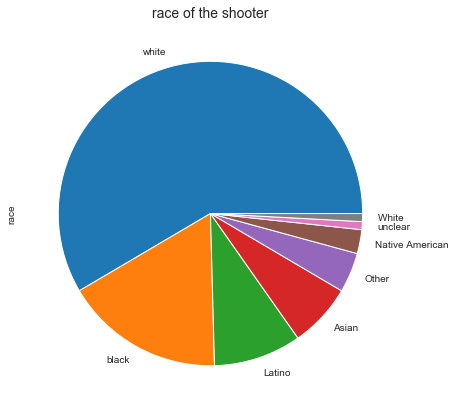

In [51]:
shoot_data['race'].value_counts().plot(kind='pie', figsize=(7,7))
plt.title('race of the shooter' , size=14)
plt.show()

more than half are white people, with a huge different

#### 4. gender
- what is the majority of gender?

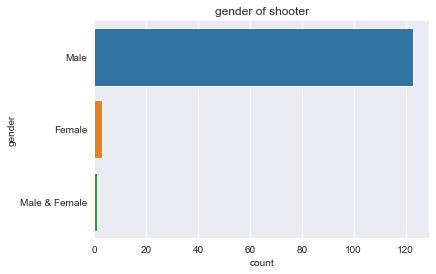

In [114]:
age = shoot_data['gender'].value_counts().index
sns.countplot(data = shoot_data , y = 'gender')
plt.title('gender of shooter')

there are female shooter & male shooter but the difference between them are very noticable

#### 5. age of shooter
- what is the majority of ages?

[Text(0.5, 1.0, 'age of shooter')]

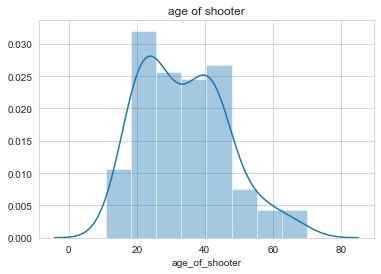

In [96]:
sns.distplot(shoot_data['age_of_shooter']).set(title='age of shooter')

most of the shooter are in thier 20s or 30s

#### 6. total victims
- what is the number of victims?

[Text(0.5, 1.0, 'total victims')]

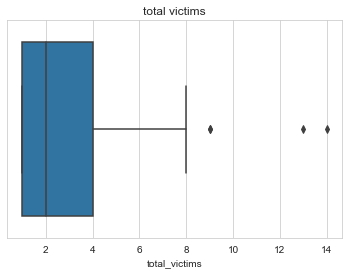

In [99]:
sns.boxplot(x = shoot_data['total_victims'].value_counts()).set(title='total victims')

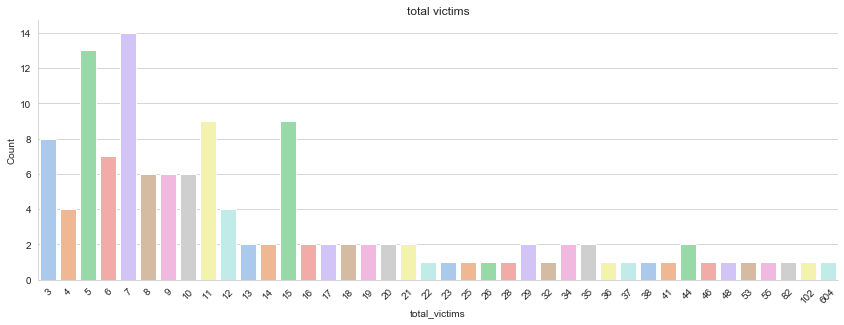

In [100]:
sns.set_style("whitegrid")
sns_year = sns.factorplot(x='total_victims', data=shoot_data, aspect=2.5, kind="count", \
                         palette="pastel").set(title='total victims')
sns_year.set(xlabel='total_victims', ylabel='Count')
sns_year.set_xticklabels(rotation=45)
plt.gcf().subplots_adjust(bottom=0.25)
plt.gcf().subplots_adjust(left=0.10)

as you cam see on the above plots the total victims are usually not very larg between (3 - 15)

### summry:
on the above univariate explorations I found out that most of the shooting are mass shooting and the male gender are more than the female gender with a huge different, also the white people do the shooting more than other race

#### 7. year & type:
- is there a relationship between year and type?

[Text(0.5, 1.0, 'year and type of shooting')]

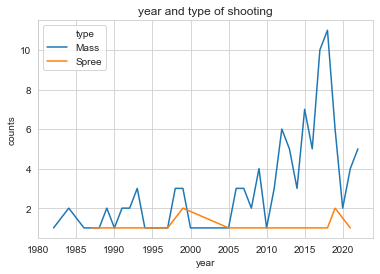

In [102]:
tim = shoot_data.groupby(['year', 'type']).size().reset_index(name = 'counts')
sns.lineplot(x = 'year', y='counts', hue = 'type', data = tim).set(title='year and type of shooting')

the number of mass shooting increased over the years as you can see on the above plot so there is a relationship between them

#### 8. Race & type:
- does the race effect the type of shooting?

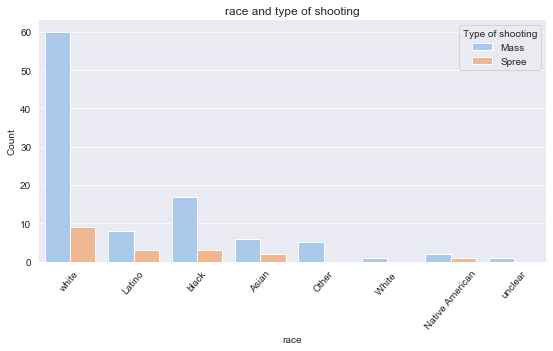

In [103]:
# Plot the dataset by Race..
sns.set_style("darkgrid")
sns_race = (sns.factorplot(x="race", hue='type', data=shoot_data, aspect=1.6, kind="count", legend_out=False, \
                        palette="pastel").add_legend(title="Type of shooting")).set(title='race and type of shooting')
sns_race.set_xticklabels(rotation=50)
sns_race.set(xlabel='race', ylabel='Count')
plt.gcf().subplots_adjust(bottom=0.30)
plt.gcf().subplots_adjust(left=0.10)


the race does effect the type of shooting because the plot above shows us that the white people usually do the mass shooting

In [60]:
shoot_data[['race', 'type']].groupby(['race', 'type']).size()

race             type 
Asian            Mass      6
                 Spree     2
Latino           Mass      8
                 Spree     3
Native American  Mass      2
                 Spree     1
Other            Mass      5
White            Mass      1
black            Mass     17
                 Spree     3
unclear          Mass      1
white            Mass     60
                 Spree     9
dtype: int64

#### 9. year & fatalities
- does the fatalities increase over the years or there is no relationship between them?

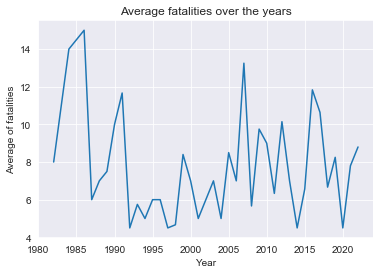

In [61]:
fatalities_mean = shoot_data.groupby(['year'])['fatalities'].mean()

sns.lineplot(x = fatalities_mean.index, y = fatalities_mean.values)
plt.title("Average fatalities over the years")
plt.xlabel("Year")
plt.ylabel("Average of fatalities")
plt.show()

I don't see a relationship between them but I think the number of fatalities people increase between the years (1980 - 1985)

#### 10. year & injured
- does the number of injured people increase over the years or there is no relationship between them?

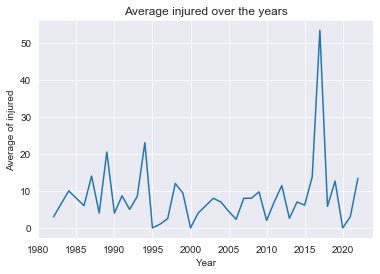

In [62]:
fatalities_mean = shoot_data.groupby(['year'])['injured'].mean()

sns.lineplot(x = fatalities_mean.index, y = fatalities_mean.values)
plt.title("Average injured over the years")
plt.xlabel("Year")
plt.ylabel("Average of injured")
plt.show()


the number of injured people are high between (2015 - 2020) but we can't say that there is a relationship between them since there is no clear increase or decrease

#### 11.  gender & type:
- does the gender of the people effect the type of shooting?

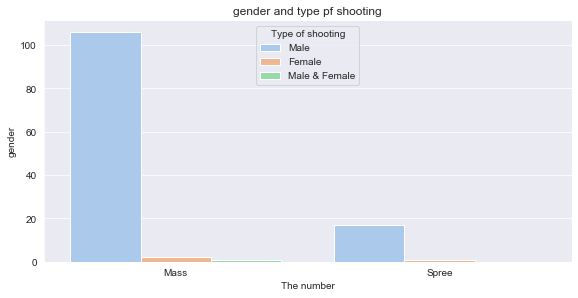

In [105]:
sns.set_style("darkgrid")
sns_gender = sns.factorplot(x="type", hue='gender', data=shoot_data, aspect=1.7, kind="count", legend_out=False, \
                         palette="pastel").set(title='gender and type pf shooting')
sns_gender.axes[0][0].legend(title="Type of shooting")
sns_gender.set(xlabel='The number', ylabel='gender')
plt.gcf().subplots_adjust(bottom=0.30)
plt.gcf().subplots_adjust(left=0.12)

I don't think that the gender of people effect the type of shooting because the male shooter are more than female shooter with a big difference so it's not accurate

#### 12. year & race
- is there a relashinship between the race of people and year?

[Text(0.5, 1.0, 'year of shooting and race of shooter')]

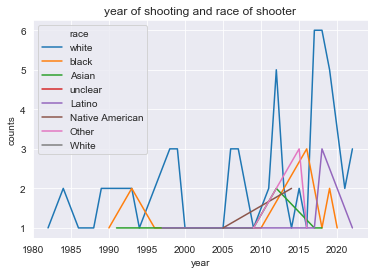

In [106]:
tim = shoot_data.groupby(['year', 'race']).size().reset_index(name = 'counts')
sns.lineplot(x = 'year', y='counts', hue = 'race', data = tim).set(title='year of shooting and race of shooter')

yes there is as the plot shown, it's increase over the years specially for white people

#### 13. race & gender
- is there a relation between the gender of people and race?

[Text(0.5, 1.0, 'race and gender of shooter')]

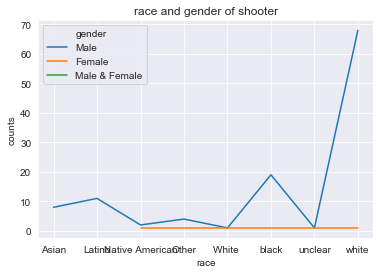

In [107]:
tim = shoot_data.groupby(['race', 'gender']).size().reset_index(name = 'counts')
sns.lineplot(x = 'race', y='counts', hue = 'gender', data = tim).set(title='race and gender of shooter')

there are no relationship between these two columns because the white people and the male are more than the other

[Text(0.5, 1.0, 'race and gender of shooter')]

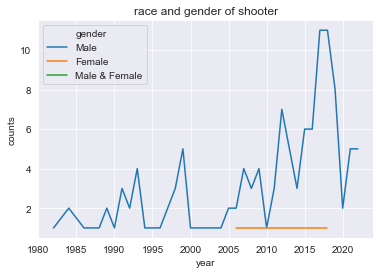

In [123]:
tim = shoot_data.groupby(['year', 'gender']).size().reset_index(name = 'counts')
sns.lineplot(x = 'year', y='counts', hue = 'gender', data = tim).set(title='race and gender of shooter')

#### 14. age of shooter & type
- is there a relationship between the age and the type of the shooting?

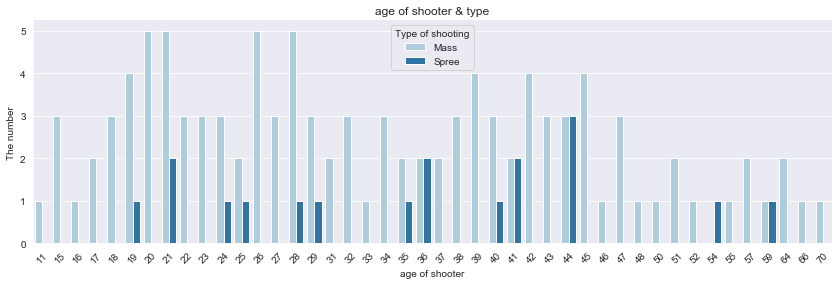

In [110]:
sns.set_style("darkgrid")
sns_race = (sns.factorplot(x="age_of_shooter", hue='type', data=shoot_data, aspect=2.5, kind="count", legend_out=False, \
                        palette="Paired").add_legend(title="Type of shooting"))
sns_race.set_xticklabels(rotation=45)
sns_race.set(xlabel='age of shooter', ylabel='The number')
plt.gcf().subplots_adjust(bottom=0.35)
plt.gcf().subplots_adjust(left=0.10)
plt.title("age of shooter & type")
plt.show()


people on there 20s and younger tend to do mass shooting more than spree shooting

### summary:
on the above bivariate explorations I found out that number of shooting increased over the year, also the race of people effect then type of shooting because the white people do a mass shooting more than other race, lastly people on there 20s or younger tend to do mass shooting more than spree shooting

#### 15. Gender, Age, and Type
- what is the correlation between Gender, Age, and Type?

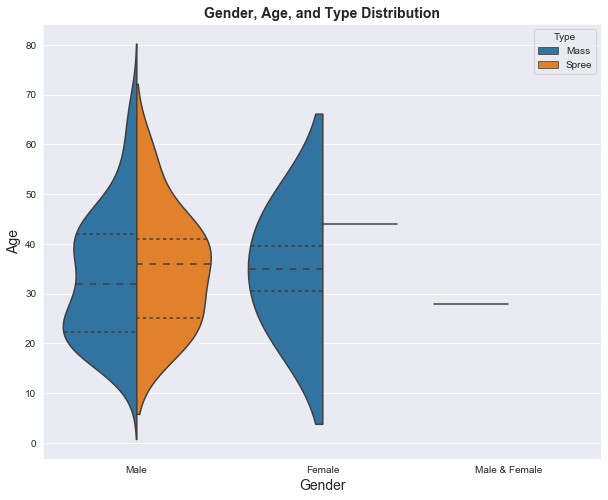

In [119]:
figure_basics("Gender, Age, and Type Distribution")
plot = sns.violinplot(data=shoot_data, x='gender', y='age_of_shooter', hue="type", split=True,  inner="quartile")
plot.set_xlabel("Gender", fontsize=14)
plot.set_ylabel("Age", fontsize=14)
plt.legend(title="Type")
plt.show()

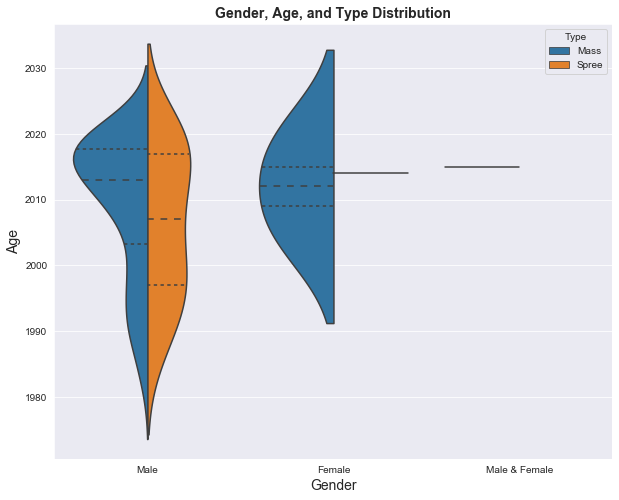

In [120]:
figure_basics("Gender, Age, and Type Distribution")
plot = sns.violinplot(data=shoot_data, x='gender', y='year', hue="type", split=True,  inner="quartile")
plot.set_xlabel("Gender", fontsize=14)
plot.set_ylabel("Age", fontsize=14)
plt.legend(title="Type")
plt.show()

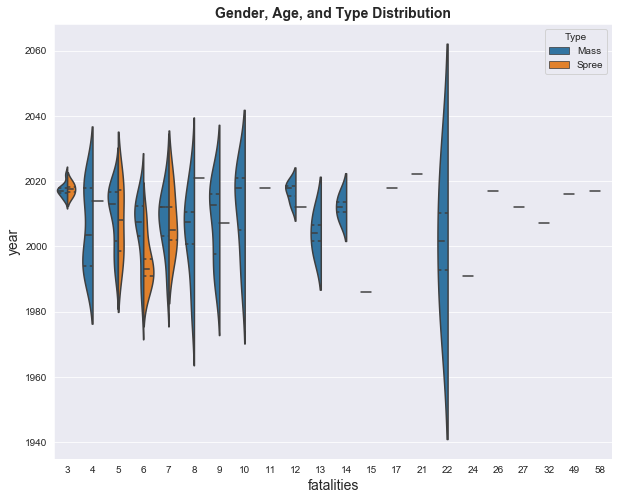

In [128]:
figure_basics("Gender, Age, and Type Distribution")
plot = sns.violinplot(data=shoot_data, x='fatalities', y='year', hue="type", split=True,  inner="quartile")
plot.set_xlabel("fatalities", fontsize=14)
plot.set_ylabel("year", fontsize=14)
plt.legend(title="Type")
plt.show()

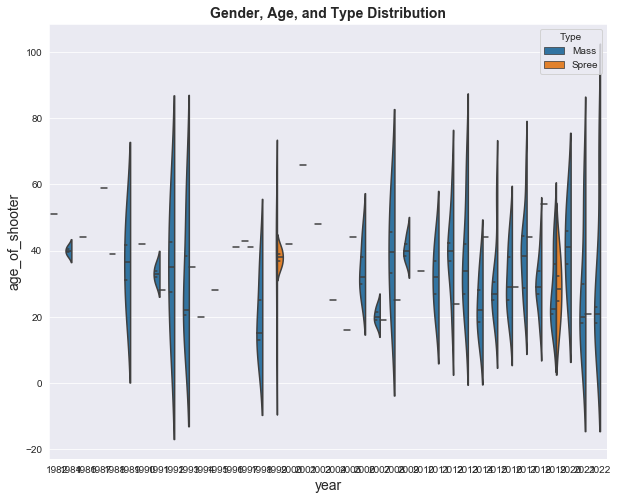

In [132]:
figure_basics("Gender, Age, and Type Distribution")
plot = sns.violinplot(data=shoot_data, x='year', y='age_of_shooter', hue="type", split=True,  inner="quartile")
plot.set_xlabel("year", fontsize=14)
plot.set_ylabel("age_of_shooter", fontsize=14)
plt.legend(title="Type")
plt.show()

most of the female (if not all) tend to do mass shooting, but on the male side there is no big difference between the two types

### summary:
after the multivariate explorations I figured that the male gender do shooting more than female gender but female do mass way more spree shooting, finally the both gender usually do the shooting between (20s and 40s)

## Conclusion:
on this project I invistegate a dataset called 'Mother Jones - Mass Shootings Database, 1982 – 2022' and based on the result above we consider gender, race, and year as an important element so, the number of crimes are increased every few years and the highest number of crimes was between 2015 – 2019 also 2022 considered as a large number. Because it’s easier to hold a gun or any kind of weapon with time considering the developing of technology and that make us think about the future and how must’ve been easy to carry a weapon. Also, the gender is very important element if you see the pivot and the tabular you will know that men murdered a lot comparing to women.

## References:

- [How to Add a Title to Seaborn Plots (With Examples)](https://www.statology.org/seaborn-title/).
- [Pyplot tutorial](https://learn.udacity.com/nanodegrees/nd002-mcit/parts/cd0016/lessons/ls2240/concepts/f39200fa-cade-4584-9f43-09b694e7f5ef).